In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import math as m
import pandas as pd
import scipy.stats as stat
import scipy.optimize as opt
import seaborn as sb
from scipy.integrate import quad
from scipy.integrate import dblquad
from scipy.special import comb
from sklearn.linear_model import LinearRegression
#plt.style.use('ggplot')

my_norm = lambda exp, disp: stat.norm(loc = exp, scale = m.sqrt(disp))

In [3]:
a = 3; b = 3;

def polynom(x):
    return x**4 -3*x*x + x + 1

m = 10
result:
        4         3         2
98.87 x - 241.6 x + 191.6 x - 55.41 x + 4.981
sigma = RSS / m = 0.651107954727138
prediction [1.913889006483779, 38.06143391857314, 309.565405790034]


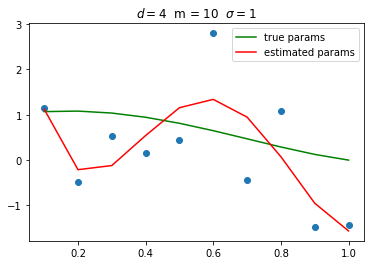

m = 20
result:
        4         3         2
2.076 x - 20.69 x + 25.85 x - 10 x + 2.382
sigma = RSS / m = 0.9831090407717673
prediction [-3.8561451213863407, -13.79916267049773, -46.57361705799148]


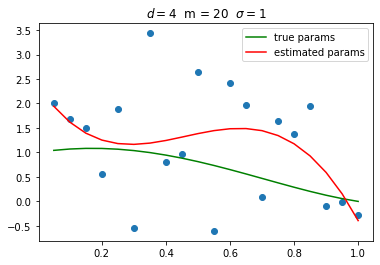

m = 50
result:
        4         3         2
8.781 x - 15.14 x + 10.73 x - 6.989 x + 2.625
sigma = RSS / m = 0.7007195108693566
prediction [1.7313458700652156, 9.630739518575755, 50.91811830690297]


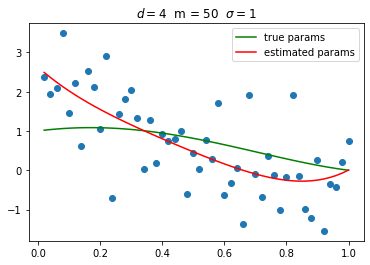

m = 10
result:
        5         4         3         2
211.4 x - 576.3 x + 549.5 x - 214.2 x + 30.58 x - 1.135
sigma = RSS / m = 0.1935344978594486
prediction [7.937102663345289, 105.80732867065012, 1145.4661468327006]


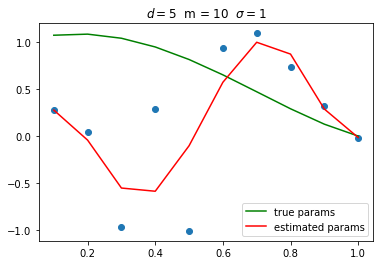

m = 20
result:
       5         4         3         2
-269 x + 658.5 x - 558.9 x + 183.5 x - 14.98 x - 0.2912
sigma = RSS / m = 0.6621256980231861
prediction [-23.441101019486865, -204.62745846493036, -1837.4390653876544]


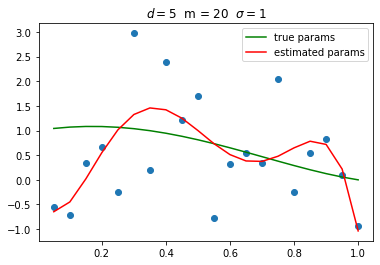

m = 50
result:
        5         4         3       2
132.5 x - 367.2 x + 377.6 x - 175 x + 33.24 x - 0.7153
sigma = RSS / m = 0.8021466055318917
prediction [7.960416971248662, 77.07509079322966, 751.698322947268]


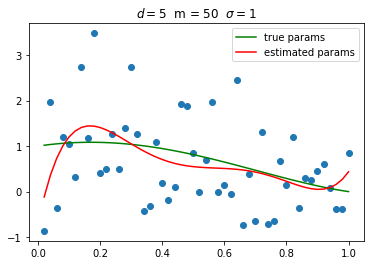

m = 10
result:
       7            6             5             4             3        2
6088 x - 2.51e+04 x + 4.239e+04 x - 3.773e+04 x + 1.887e+04 x - 5193 x + 702.8 x - 32.47
sigma = RSS / m = 0.3385890586816322
prediction [62.54305618010233, 2082.4299298892856, 57532.93887553016]


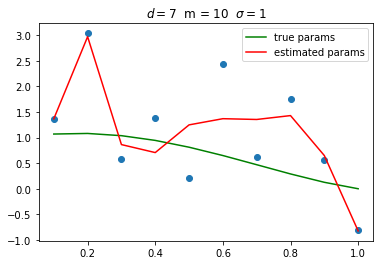

m = 20
result:
        7        6        5        4        3         2
595.7 x - 2402 x + 3845 x - 3147 x + 1420 x - 354.5 x + 43.49 x - 0.6186
sigma = RSS / m = 0.253715839729593
prediction [-2.0814044047957587, 139.63894903203516, 5217.110743177486]


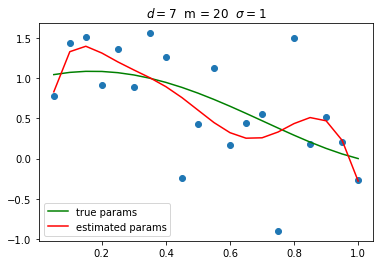

m = 50
result:
         7         6        5        4        3       2
-86.27 x - 311.1 x + 1442 x - 1866 x + 1094 x - 314 x + 41.7 x - 1.279
sigma = RSS / m = 0.588711226784218
prediction [-30.92260152817533, -463.27609737337906, -7071.403149550647]


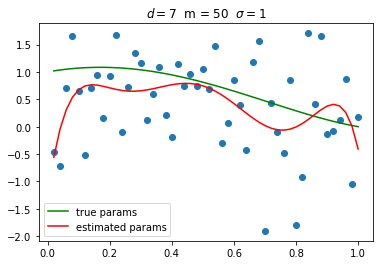

In [77]:
a = 3; b = 3;
for d in [4, 5, 7]:
    for m0 in [10, 20, 50]:
        xs = np.arange(1 / m0, 1 + 1/m0, step = 1 / m0)
        ys = np.array([polynom(elem) + my_norm(0, 1).rvs() for elem in xs])
        X = np.array([np.geomspace(elem**d, 1, num = d + 1) for elem in xs])
        #--------------------------------------------------------------------
        res = LinearRegression().fit(X, ys)
        result = res.coef_[:-1]
        result = np.append(result, [res.intercept_])
        new_polynom = np.poly1d(result)
        #-------------------------------------------------------------------
        print('m =', m0)
        print('result:\n', np.poly1d(new_polynom))
        print('sigma = RSS / m = ' + str(np.linalg.norm(ys - X@result) ** 2 / m0))
        print('prediction', [res.predict([np.geomspace(elem**d, 1, num = d + 1)])[0] for elem in [1.2, 1.5, 2] ])

        plt.scatter(xs, ys)
        plt.plot(xs, [polynom(elem) for elem in xs] , label = 'true params', color = 'green')
        plt.plot(xs, [new_polynom(elem) for elem in xs] , label = 'estimated params', color = 'red')

        plt.legend()
        plt.title('$d =$' + str(d) + '  m = ' + str(m0) + '  $\\sigma = 1$')
        plt.show()

$RSS = || (y - Xa)||^2 $

### Part two is lower 
       |||
       vvv

prediction [-5.124890372856262, -12.521353787346262, -16.264422266072067]
prediction [1.4751932615321885, 57.355329043524485, 682.1928336395297]
prediction [-202.23459666576355, -5563.620577432612, -142813.6611262352]
true value: [-0.04639999999999955, 0.8125, 7]


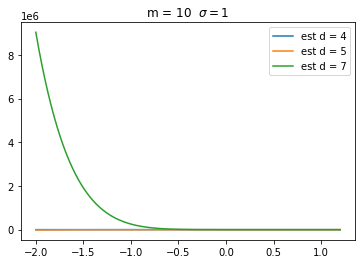

prediction [-1.5388835652346062, -0.15831557493545056, 25.888573133717237]
prediction [7.9799435804626295, 92.65486299392897, 911.5287429234819]
prediction [-16.28869508881947, -254.65063888397603, -3610.7551362875956]
true value: [-0.04639999999999955, 0.8125, 7]


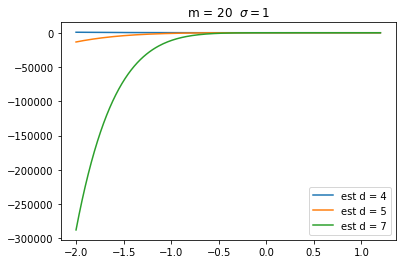

prediction [1.0988915385897209, 9.250630356813057, 58.386083945241204]
prediction [-1.7734493308983832, -17.221906984372676, -186.6279493863618]
prediction [-10.519116197600727, -205.45548820481224, -4280.321466056439]
true value: [-0.04639999999999955, 0.8125, 7]


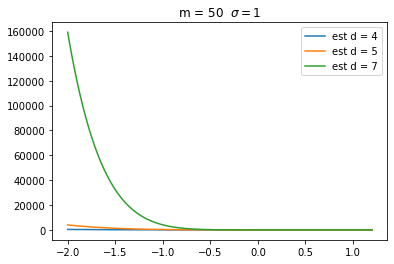

In [96]:
a = 3; b = 3;
x_axis = np.linspace(-2, 1.2, 200)
for m0 in [10, 20, 50]:
    xs = np.arange(1 / m0, 1 + 1/m0, step = 1 / m0)
    ys = np.array([polynom(elem) + my_norm(0, 1).rvs() for elem in xs])
    for d in [4, 5, 7]:

        X = np.array([np.geomspace(elem**d, 1, num = d + 1) for elem in xs])
        #--------------------------------------------------------------------
        res = LinearRegression().fit(X, ys)
        result = res.coef_[:-1]
        result = np.append(result, [res.intercept_])
        new_polynom = np.poly1d(result)
        #-------------------------------------------------------------------
        print('prediction', [res.predict([np.geomspace(elem**d, 1, num = d + 1)])[0] for elem in [1.2, 1.5, 2] ])

        #plt.scatter(xs, ys)
        #plt.plot(xs, [polynom(elem) for elem in xs] , label = 'true params', color = 'green')
        plt.plot(x_axis, new_polynom(x_axis) , label = 'est d = '+str(d))

        plt.legend()
        plt.title('m = ' + str(m0) + '  $\\sigma = 1$')
    print('true value:', [polynom(x) for x in [1.2, 1.5, 2]])
    plt.show()

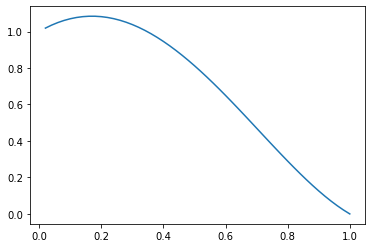

In [32]:
plt.plot(xs, polynom(xs))

In [51]:
tester = [1, 2, 3, 4, 5]

tester[:-1][::-1]

[4, 3, 2, 1]

In [83]:
import matplotlib
matplotlib.colors

<module 'matplotlib.colors' from 'C:\\Users\\Acer\\anaconda3\\lib\\site-packages\\matplotlib\\colors.py'>